# Using Custom Functions as a Module


## Lesson Objectives
- Move custom functions to .py file
- Add the .py file to your PYTHONPATH (so it can be accessed anywhere on your PC)
- Importing your custom module so that it auto-reloads when edited.

## Modules Revisited

A module is simply a python file (.py) that contains functions and classes to be imported and used in Python notebooks/files. e.g. `import pandas as pd`

A .py file that will be used as a module should:
- Include the imports for every package used in the .py file
- Only include static code (do not run the functions, just define them)


# How to Save Python Functions as Modules 



### Importing Custom Modules Locally

>  ***What is the simplest way to save python functions so that they can be reused almost anywhere, without actually publishing a python package?***

The simplest way to save Python functions so that they can be reused almost anywhere is to put them into a .py file (often referred to as a Python module) and import this file when you need the functions.

Here's a step-by-step guide:

1. **Create a Python module**. Let's say you have a function to add two numbers:

   ```python
   def add_two_numbers(a, b):
       return a + b
   ```

   Save this function in a .py file. For example, save it as `my_functions.py`.

2. **Use the function in another script**. You can import this module into another Python script like this:

   ```python
   import my_functions as mf
   
   result = mf.add_two_numbers(1, 2)
   print(result)  # Output: 3
   ```

   Note: The Python script and `my_functions.py` should be in the same directory for this to work. If they're not, you'd need to adjust the system's PYTHONPATH to include the directory where your module resides.




### Update Custom Functions while using in a notebook



> ***How can I import my custom my_functions module in a Jupyter Notebook in a way that lets me continue to edit the .py file and have the module automatically reload itself with the updated code?***

If you're actively developing and changing a Python module, and you want those changes to be immediately available in your Jupyter Notebook, you can use the `autoreload` extension from IPython.

Here's a step-by-step guide:

1. **Load the `autoreload` extension**. In your Jupyter notebook, run the following code:

   ```python
   %load_ext autoreload
   ```

2. **Set autoreload mode**.
   - `%autoreload 2`: Reloads all modules  every time before executing the Python code typed.


   ```python
   %autoreload 2
   ```

3. **Import your module**. Now, you can import your module:

   ```python
   import my_functions as mf
   ```

**Combined, the code would would look like the following (note that the extension is loaded *before* the import):**

  ```python
  %load_ext autoreload
  %autoreload 2
  import my_functions as mf
  ```

With this setup, changes made to the `my_functions.py` file will automatically be reflected in the Jupyter Notebook, without needing to restart the kernel or manually reimport the module. Note that this may not always work for certain types of changes, like changes to a class definition. It works best for function definitions.


One important thing to note is that while `autoreload` can be very useful during development, it might make your code behave in ways you don't expect, since the module state can change without you explicitly reloading it. Therefore, once your code is stable, it is a good practice to remove the `autoreload` statements and import your modules in the standard way.

___


In [1]:
%load_ext autoreload
%autoreload 2

# import your custom function file with an alias


In [ ]:
# Call your new function from the .py file to add 3 and 5


# Adding functions to the .py file

Writing a demo custom function for .py file:

- def demo_function(name):
- print(f'Hello, {name}!')

## Be sure to SAVE the .py file 

In [2]:
# # Test the autoreload of new function with your name
# def demo_fun(name):
#     print(f'Hello ,{name}!')

In [7]:
demo_fun('Purvi')

Hello ,Purvi!


### Common Issues & Gotcha's



> ***What tips or things to watch out for do you have for someone who is moving functions from their jupyter notebook to a .py file for the very first time? What are some of the common gotcha's/issues that people run into?***

Moving Python functions from a Jupyter Notebook to a .py file is generally a straightforward process, but there are some things you need to be mindful of. Here are some tips and common issues to watch out for:

1. **Hardcoded Paths**: If you have hardcoded paths for file I/O operations, these may no longer be correct when you move your function to a .py file in a different directory. Consider using relative paths or dynamically generating paths using Python's `os` module.
2. **Variable Dependencies**: In a Jupyter notebook, it's common to use globally defined variables within functions. If your function depends on global variables, ensure these are passed as arguments to the function in the .py file. Your functions should ideally not rely on global state.
3. **Order of Execution**: In Jupyter, you can run cells out of order. This can sometimes create dependencies that aren't immediately obvious. When you move your code to a .py file, everything is run sequentially from top to bottom, so you may need to rearrange your function definitions.
4. **Interactive Features**: Functions in Jupyter notebooks may leverage interactive features, such as magic commands (e.g., `%matplotlib inline`) or use `input()` to get user input. These may not work as expected in a .py file, and alternatives should be considered.
5. **Error Handling**: In a Jupyter Notebook, you may have become accustomed to writing quick-and-dirty code without much error handling, since you can interactively debug issues. In a .py file, you should add appropriate error handling to your functions.
6. **Imports**: Ensure that all necessary imports are included at the beginning of your .py file. You may have imported libraries in different cells of your notebook. It's important to consolidate these imports in your .py file.
7. **Refactoring**: This is a good opportunity to refactor your code. Make sure each function does one thing and does it well. Ensure your function names and variables are descriptive, and consider adding docstrings to your functions to explain what they do.
8. **Testing**: Make sure to test your functions after moving them to the .py file. Just because they worked in the notebook doesn't mean they'll still work in the new context.

Remember, code in a .py file should be self-contained and not depend on any hidden state, which is a common gotcha when moving from Jupyter notebooks to .py files.

# 🕹️CodeAlong Activity

- Create a custom_functions.py file in the top-level of this repository.
- Move the evaluation functions below into the .py file
- Import the custom_functions into this notebook.
- Test evaluation fucntion with the provided joblib

# Testing Our Custom Module

We will test our module using the evaluate_classification function on the following model:

In [5]:
import joblib
fpath_joblib = "example-clf-model-with-data.joblib"
loaded = joblib.load(fpath_joblib)
loaded.keys()

dict_keys(['model', 'training data', 'test data'])

In [6]:
# Load the model and data to evaluate
model = loaded['model']
X_train, y_train = loaded['training data']
X_test, y_test = loaded['test data']
model

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('naivebayes', MultinomialNB())])

## Preview the demo.py file in the main page to see the functions we've added

## Import Custom Module

In [8]:
# Load the autoreload extension and import custom module
%load_ext autoreload
%autoreload 2
import demo as fn
# Hint: We will expect an error here, why?

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'demo'

#### Add the Module to the Python Path

In [9]:
import sys, os
# Check sys.path for python path
sys.path

['/Users/purvikansara/Documents/CD_GitHub/AML_CodeAlong/adv-ml-wk02-deep-nlp-codealongs/Lecture 1 Pt1 - Making a Custom Module',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python310.zip',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/lib-dynload',
 '',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages']

We need to append the absolute filepath of the folder that contains our module.  (the folder up one level "../")

In [10]:
# Get the absolute file path of parent directory
os.path.abspath('../')

'/Users/purvikansara/Documents/CD_GitHub/AML_CodeAlong/adv-ml-wk02-deep-nlp-codealongs'

In [11]:
# Add parent directory to python path
sys.path.append(os.path.abspath("../"))

In [12]:
sys.path[-1]

'/Users/purvikansara/Documents/CD_GitHub/AML_CodeAlong/adv-ml-wk02-deep-nlp-codealongs'

In [13]:
# Now that hte path is defined, try again
%load_ext autoreload
%autoreload 2
import demo as fn


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
dir(fn)

['ConfusionMatrixDisplay',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'classification_metrics',
 'classification_report',
 'convert_y_to_sklearn_classes',
 'demo_function',
 'evaluate_classification',
 'evaluate_classification_network',
 'get_true_pred_labels',
 'make_text_vectorization_layer',
 'np',
 'plot_history',
 'plt',
 'pprint']

In [15]:
fn.demo_function('Purvi')


Hello, Purvi!


### Test fn.evaluate_classification

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       559
           1       0.99      0.95      0.97       559

    accuracy                           0.97      1118
   macro avg       0.97      0.97      0.97      1118
weighted avg       0.97      0.97      0.97      1118



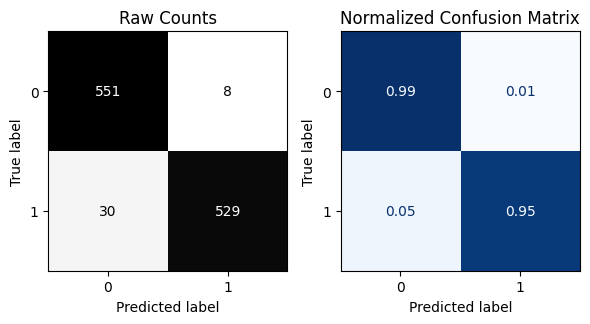


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1655
           1       0.68      0.91      0.78       253

    accuracy                           0.93      1908
   macro avg       0.83      0.92      0.87      1908
weighted avg       0.94      0.93      0.94      1908



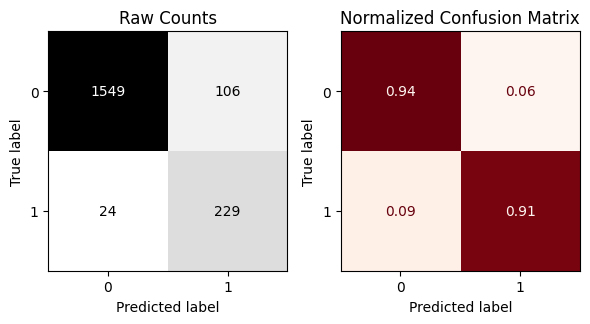

In [16]:
fn.evaluate_classification(model,X_train, y_train, X_test, y_test)


# (Bonus) Making a Package with Sub-Modules

#### [Official Packaging Tutorial](https://packaging.python.org/tutorials/packaging-projects/)
- Our module is structure like this:
```
custom_package
    └── __init__.py
    └── evaluate.py
    └── nlp.py
```

- The folder can contain other py files as well, but its needs an `__init__.py` to be recognized as a package. 
- The other py files can be import inside of `__init__.py` to make them part of the namespace\

  
```python
# Contents of __init__.py:
from . import evaluation
from . import nlp
```

In [17]:
## Load the autoreload extension
%load_ext autoreload 
%autoreload 2

import custom_package_SOLUTION  as cp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dir(cp.evaluation)

In [ ]:
dir(cp.nlp)

In [ ]:
cp.evaluation.evaluate_classification(model, X_train, y_train, X_test, y_test)

# APPENDIX

## Accessing Local Modules From Any Directory

3. **For using in different projects across your machine**, a slightly more advanced way to reuse your functions is to create a special directory (e.g., ~/my_python_modules) where you will store such .py files. Then add this directory to the PYTHONPATH environment variable:

   - **On Unix/Linux/Mac**:
     - Open your terminal.
     - Open your shell's profile script (`.bashrc`, `.bash_profile`, or `.zshrc` for Bash/Zsh).
     - Add this line to the end of the file: `export PYTHONPATH="${PYTHONPATH}:~/my_python_modules"`
     - Save and close the text editor.
     - Either source the profile script (e.g., `source ~/.bashrc`) or close and re-open your terminal.
   - **On Windows**:
     - Open System Properties/Advanced/Environment Variables.
     - Choose New under System variables.
     - Enter PYTHONPATH as the variable name and the path to the directory as the variable value.
     - Click OK until you're out of the dialog. The changes will take effect after a restart.

   Now you can import your function in any Python script across your system like this:

   ```python
   import my_functions
   
   result = my_functions.add_two_numbers(1, 2)
   print(result)  # Output: 3
   ```


## Resources


- ChatGPT Chat: https://chat.openai.com/share/d6d5daca-798a-405b-90de-8eb6e41435e1
